<font color='darkred'> </font>

# **Autoencoders**

As part of the exercise, you will examine how an autoencoder works to classify a data set.



In [7]:
# train autoencoder for classification with no compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
#from tensorflow.keras.utils.plot_model import plot_model
from matplotlib import pyplot

We will use scikit-learn's make_classification() function to define a synthetic classification dataset (2 classes) with 100 input features (columns) and 1,000 examples (rows).

<font color='darkorange'>In the given problem most of the features are 90% redundant, allowing the autoencoder to later learn a really useful compressed representation</font>


In [8]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
# number of input columns
n_inputs = X.shape[1]
# summarize the dataset
print(X.shape, y.shape)

(1000, 100) (1000,)


Next, we will develop an MLP autoencoder model

The model will take all the examples in the input and then output the same values.Therefore it will learn to recreate the same pattern

The autoencoder consists of two parts: encoder and decoder.

Once the autoencoder is trained, the decoder will not be used again, and we only keep the encoder to compress input examples into the vectors output from the bottleneck.

In this first autoencoder, we will not compress the input at all and use the same number of intermediate synapses as the number of input nodes (so equal to the number of sample dimensions). This will be implemented so that the model learns almost perfectly and we confirm that the model is implemented correctly.

Before defining and fitting the model, we will split the data into training and test sets and scale the input data by normalizing the values to the range 0-1.

In [9]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)

defining encoder that have two hidden layers, the first with twice the number of input dimensions (e.g 200) and the second with the original number of dimensions (100).

In [10]:
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)

The decoder will have the reverse structure of the encoder.

In [11]:
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)

In [12]:
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [13]:
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=200, batch_size=16, verbose=0, validation_data=(X_test,X_test))

Παρακάτω παρατείθενται οι καμπύλες μάθησης για το train και το test dataset.

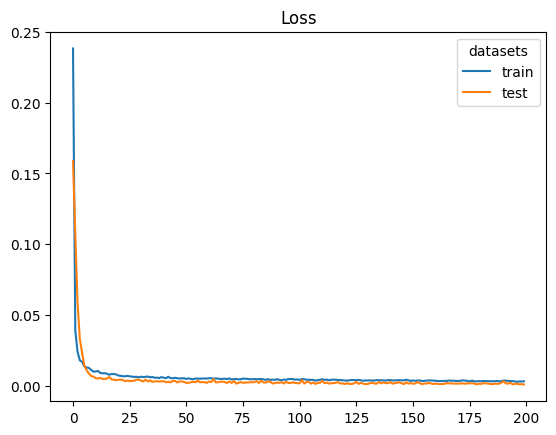

In [14]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend(title = "datasets")
pyplot.title("Loss")
pyplot.show()

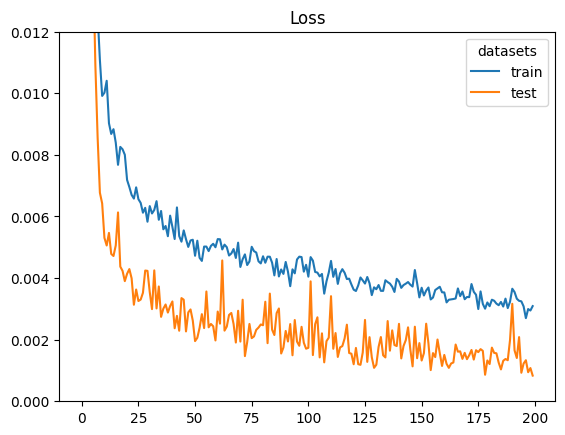

In [15]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend(title = "datasets")
pyplot.title("Loss")
pyplot.ylim([0,0.012]) 
pyplot.show()

In [16]:
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = 50  # Bottleneck = 50
bottleneck = Dense(n_bottleneck)(e)

In [18]:
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)

In [19]:
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [20]:
history = model.fit(X_train, X_train, epochs=200, batch_size=16, verbose=0, validation_data=(X_test,X_test))

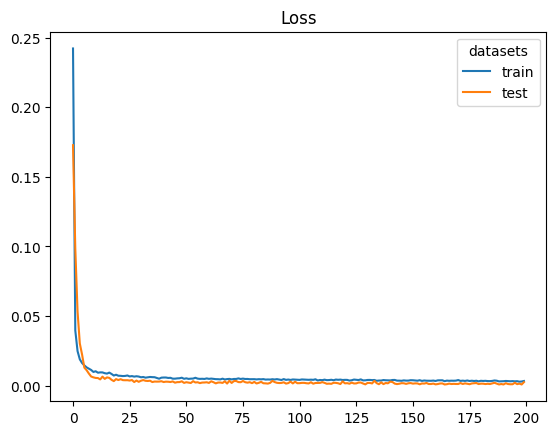

In [21]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend(title = "datasets")
pyplot.title("Loss")
pyplot.show()

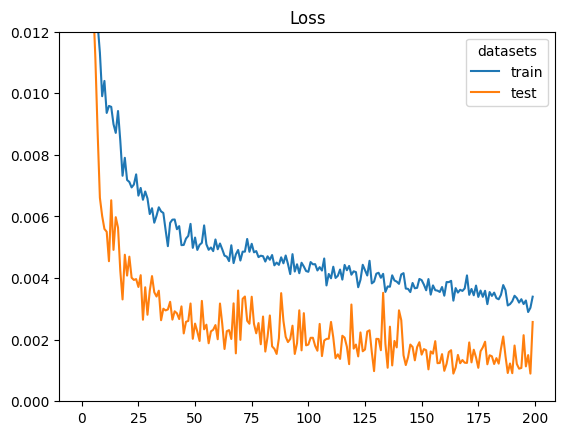

In [22]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend(title = "datasets")
pyplot.title("Loss")
pyplot.ylim([0,0.012]) 
pyplot.show()

In [23]:
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = 25  # Bottleneck = 25
bottleneck = Dense(n_bottleneck)(e)

In [25]:
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)

In [26]:
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [27]:
history = model.fit(X_train, X_train, epochs=200, batch_size=16, verbose=0, validation_data=(X_test,X_test))

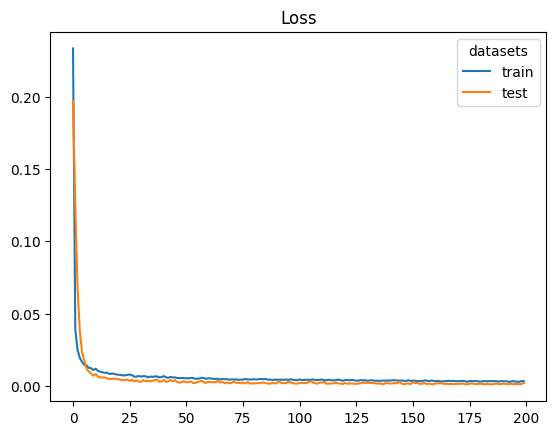

In [28]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend(title = "datasets")
pyplot.title("Loss")
pyplot.show()

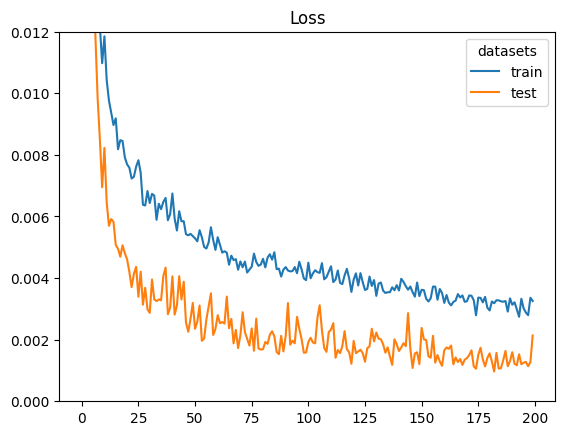

In [29]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend(title = "datasets")
pyplot.title("Loss")
pyplot.ylim([0,0.012]) 
pyplot.show()

In [30]:
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 3  #the extra level
e = Dense(n_inputs/2)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = 50  # Bottleneck = 50
bottleneck = Dense(n_bottleneck)(e)

In [31]:
# define decoder, level 1
d = Dense(n_inputs/2)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 3
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)

In [32]:
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [33]:
history = model.fit(X_train, X_train, epochs=200, batch_size=16, verbose=0, validation_data=(X_test,X_test))

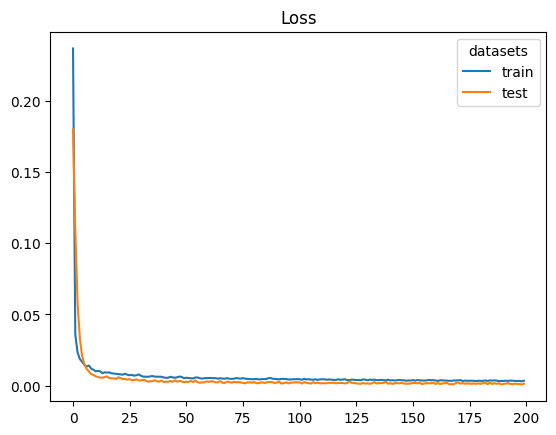

In [34]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend(title = "datasets")
pyplot.title("Loss")
pyplot.show()

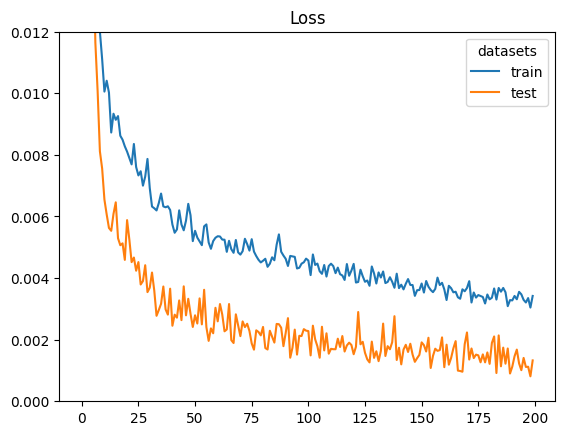

In [35]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend(title = "datasets")
pyplot.title("Loss")
pyplot.ylim([0,0.012])
pyplot.show()